In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math as m

male = [12,7,7,10,8,10,11,9,9,13,4,9,12,11,9,9,7,12,10,13,11,10,6,12,11,9,10,12,8,9,13,10,9,7,10,7,10,8,11,10,11,7,15,8,9,9,11,13,10,13]
female = [11,10,11,10,11,12,12,10,9,9,9,10,8,7,12,9,7,8,9,8,7,7,9,9,12,10,9,13,9,9,10,9,6,12,8,11,8,8,11,12,9,10,11,14,12,7,11,10,9,11]

#### Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.

Rationale: Is there a significant difference in the mean time spent on cellphone usage between girls and boys.

#### Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?
Let $\mu_1$ be the mean time spent on cell phones by the male sex.

Let $\mu_2$ be the mean time spent on cell phones by the female sex.

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \neq \mu_2$

In [5]:
tStat,pVal = stats.ttest_ind(male,female)
print(f"T-Statistic: {tStat}")
print(f"P-Value: {pVal}")

T-Statistic: 0.30394907866566184
P-Value: 0.7618111039906375


**Recommendation:**

Since the p-value is not less than 0.05 then we cannot reject the null hypothesis, hence the mean of both groups does not contain any significant difference between the two groups. Check for normality and assumptions of the independent t-test, the sample size of the data is too small which is not representative of the population. If assumptions and sample size are sufficient we can conduct a deeper analysis by finding a correlation between their study time and the hours spent on their phone, and determine if their usage is mostly academic purposes, provided there is data for it.

####  Provide descriptive statistical summaries of the data for each gender category.

In [19]:
data = {'sex': ['male'] * len(male) + ['female'] * len(female), 
        'hours_spent': male + female}
df = pd.DataFrame(data)
descStats = df.groupby('sex')['hours_spent'].describe()

kurtosis = df.groupby('sex')['hours_spent'].apply(stats.kurtosis)
skewness = df.groupby('sex')['hours_spent'].apply(stats.skew)
median = df.groupby('sex')['hours_spent'].median()
variance = df.groupby('sex')['hours_spent'].apply(np.var, ddof=1)

descStats['Skew'] = skewness
descStats['Kurt'] = kurtosis
descStats['Midean'] = median
descStats['Var'] = variance

descStats

,count,mean,std,min,25%,50%,75%,max,Skew,Kurt,Midean,Var
sex,,,,,,,,,,,,
female,50.0,9.70,1.775686,6.0,9.0,9.5,11.0,14.0,0.130345,-0.516480,9.5,3.153061
male,50.0,9.82,2.154161,4.0,9.0,10.0,11.0,15.0,-0.111207,0.042378,10.0,4.640408


#### What is the 95% confidence interval for the population mean of each gender category, and what is the 95% confidence interval for the difference between the means of the two populations?

In [37]:
ciLow = df.groupby('sex')['hours_spent'].mean() - (1.96*(df.groupby('sex')['hours_spent'].std()/m.sqrt(50)))
ciHigh = df.groupby('sex')['hours_spent'].mean() + (1.96*(df.groupby('sex')['hours_spent'].std()/m.sqrt(50)))
print("95% confidence interval for the population mean of each gender category:\n")
print(f"Female Confidence Interval: ({ciLow.iloc[0]}, {ciHigh.iloc[0]})")
print(f"Male Confidence Interval: ({ciLow.iloc[1]}, {ciHigh.iloc[1]})")

95% confidence interval for the population mean of each gender category:

Female Confidence Interval: (9.207804916725085, 10.192195083274914)
Male Confidence Interval: (9.2228971277912, 10.417102872208801)


In [44]:
stdDev_male = np.array(male).std()
stdDev_female = np.array(female).std()

meanMale = np.array(male).mean()
meanFemale = np.array(female).mean()

marginOfError = 1.96*np.sqrt((stdDev_male**2 / 50) + (stdDev_female**2 / 50))
ciLowA = (meanMale-meanFemale)-marginOfError
ciHighA = (meanMale-meanFemale)+marginOfError

print("95% confidence interval for the difference between the means of the two populations: \n")
print(f"Confidence Interval: ({ciLowA}, {ciHighA})")

95% confidence interval for the difference between the means of the two populations: 

Confidence Interval: (-0.6460366069581782, 0.8860366069581802)


#### Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.

There is a need for larger sample sizes to provide accurate and representative analysis and conclusions, it is also to avoid type I errors where we can ensure that our tests can perform with a large power and proper outcome. 

#### Make a report including the testing of the assumptions for two independent samples t-test.

Assumptions:

1.  The dependent variable needs a continuous scale
2.  The independent variable needs to have two independent groups with
    two levels.
3.  The data should have independence of observations. More
    specifically, there shouldn’t be the same participants in both
    groups.
4.  The dependent variable should be normally or near-to-normally
    distributed for each group
5.  There should be no extreme outliers.
6.  The data must have homogeneity of variances.

Assumptions:

1.  The dependent variable needs a continuous scale ✔️

-> The dependent variable is in terms of time, then this assumption is satisfied.

2.  The independent variable needs to have two independent groups with
    two levels. ✔️

-> The independent variables are divided into distinct groups which are female and male gender, then this assumption is satisfied.

3.  The data should have independence of observations. More
    specifically, there shouldn’t be the same participants in both
    groups.✔️

-> No participants can have two genders at the same time, then this assumption is satisfied.

In [50]:
s, pValue = stats.shapiro(df['hours_spent'])
print(f"P-Value: {pValue}")

P-Value: 0.0448431670665741


4. The dependent variable should be normally or near-to-normally distributed for each group ✔️

-> Since p-value is less than 0.05 then the data is normally distributed, by the shapiro wilk test this assumption is satisfied.

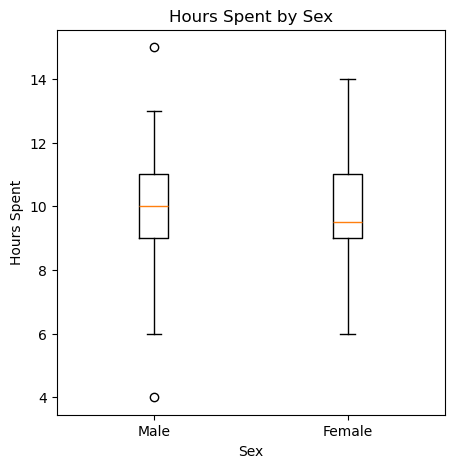

In [51]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
bp = plt.boxplot([male, female], labels=['Male', 'Female'])

ax.set_title('Hours Spent by Sex')
ax.set_ylabel('Hours Spent')
ax.set_xlabel('Sex')

plt.show()

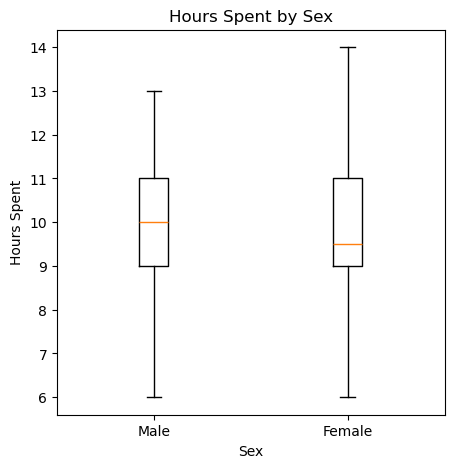

In [52]:
male = [12,7,7,10,8,10,11,9,9,13,9,12,11,9,9,7,12,10,13,11,10,6,12,11,9,10,12,8,9,13,10,9,7,10,7,10,8,11,10,11,7,8,9,9,11,13,10,13]
female = [11,10,11,10,11,12,12,10,9,9,9,10,8,7,12,9,7,8,9,8,7,7,9,9,12,10,9,13,9,9,10,9,6,12,8,11,8,8,11,12,9,10,11,14,12,7,11,10,9,11]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
bp = plt.boxplot([male, female], labels=['Male', 'Female'])

ax.set_title('Hours Spent by Sex')
ax.set_ylabel('Hours Spent')
ax.set_xlabel('Sex')

plt.show()

5. There should be no extreme outliers. ✔️

-> By removing the outliers, the assumption is satisfied.

In [53]:
data = {'sex': ['male'] * len(male) + ['female'] * len(female), 
        'hours_spent': male + female}
df = pd.DataFrame(data)

In [55]:
s, pValue = stats.levene(male, female)
print(f"P-Value: {pValue}")

P-Value: 0.8536266117489479


6. The data must have homogeneity of variances. ✔️

-> Since the p-value is greater than 0.05 then by levene's test the assumption is satisfied.

Since we satisfied all assumptions of the independent samples t-test we can perform the hypothesis test, with the following hypotheses:

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \neq \mu_2$

In [56]:
tStat,pVal = stats.ttest_ind(male,female)
print(f"T-Statistic: {tStat}")
print(f"P-Value: {pVal}")

T-Statistic: 0.36074614928825416
P-Value: 0.7190818116406612


Since the p-value is not less than 0.05 then we cannot reject the null hypothesis, hence the mean of both groups does not contain any significant difference between the two groups. Given the t-statistics, we can see that it is very close to 0 which means that there is little to no significant difference between the two groups, and since it is positive this indicates that the first group male 